# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [52]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [5]:
hospital_read_df['Number of Discharges'].values

array(['242', '247', '586', ..., '0', 'Not Available', 'Not Available'],
      dtype=object)

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


C:\Users\milen\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
len(clean_hospital_read_df['Number of Discharges'].unique())

1294

In [8]:
clean_hospital_read_df['Number of Discharges'][82]  # clean_hospital_read_df['Number of Discharges'][:81] got zero values

199

In [9]:
clean_hospital_read_df['Number of Discharges'][-5:]

8126     2716
6643     2740
1892     3570
13615    3980
13666    6793
Name: Number of Discharges, dtype: int32

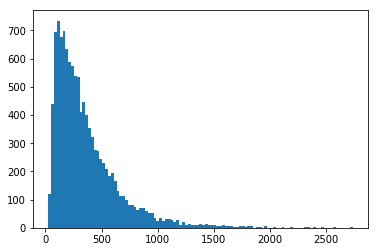

In [10]:
clean_hospital_read_df['Number of Discharges'][81:-3].hist(grid=False, bins=107)

Right skewed distributions.

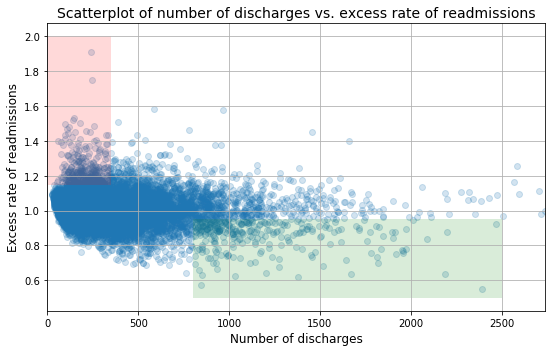

In [11]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Initial observations based on the plot above

* ~~Overall, rate of readmissions is trending down with increasing number of discharges~~
* With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
* With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)  
  
As boxplots sho below, the majority of the data is in interval $<0.8, 1.2>$. We can't claim that this is true, as the data from interval > 1.2 can be outliers.

Text(0, 0.5, 'Excess readmission')

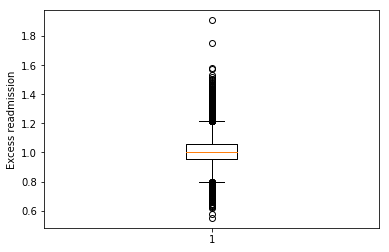

In [12]:
plt.boxplot(y)
plt.ylabel("Excess readmission")

### A. Initial observations based on the plot above

* ~~Overall, rate of readmissions is trending down with increasing number of discharges~~
* With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
* ~~With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)~~

Text(0, 0.5, 'Number of discharges')

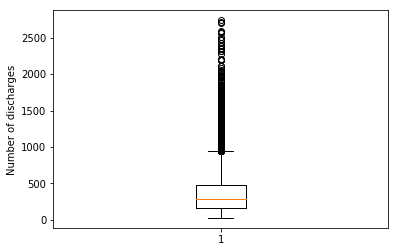

In [13]:
plt.boxplot(x)
plt.ylabel("Number of discharges")

With lower number of discharges, there is a greater incidence of excess rate of readmissions. This can we claim as majority of data are located here. On the other hand, the other claim can't we say with confidence, as those are outliers.

### B. Statistics

* ~~In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1~~
* In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [66]:
# lets drop a few rows that have null values 
df2 = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions'])

In [72]:
df_100 = df2[df2['Number of Discharges'] < 100]

In [73]:
df_100['Excess Readmission Ratio'].describe()

count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

In [74]:
df_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 1832 to 4449
Data columns (total 12 columns):
Hospital Name                 1188 non-null object
Provider Number               1188 non-null int64
State                         1188 non-null object
Measure Name                  1188 non-null object
Number of Discharges          1188 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      1188 non-null float64
Predicted Readmission Rate    1188 non-null float64
Expected Readmission Rate     1188 non-null float64
Number of Readmissions        1188 non-null float64
Start Date                    1188 non-null object
End Date                      1188 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 116.0+ KB


In [75]:
all_df = len(df_100['Excess Readmission Ratio']) 
all_df_100 = len(df_100[df_100['Excess Readmission Ratio'] > 1])

In [76]:
perct = all_df_100 / all_df
perct

0.6321548821548821

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and ~~63%~~ **59%** have excess readmission rate greater than 1

In [80]:
df_1000 = df2[df2['Number of Discharges'] > 1000]

In [81]:
df_1000['Excess Readmission Ratio'].describe()

count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64

In [82]:
df_1000.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
11757,FLETCHER ALLEN HOSPITAL OF VERMONT,470003,VT,READM-30-AMI-HRRP,1002,NaN,0.9192,14.0,15.2,136.0,07/01/2010,06/30/2013
821,CRITTENTON HOSPITAL MEDICAL CENTER,230254,MI,READM-30-HIP-KNEE-HRRP,1004,NaN,1.1405,6.1,5.4,64.0,07/01/2010,06/30/2013
2363,YUMA REGIONAL MEDICAL CENTER,30013,AZ,READM-30-PN-HRRP,1007,NaN,1.0760,18.5,17.2,191.0,07/01/2010,06/30/2013
7188,EVANSTON HOSPITAL,140010,IL,READM-30-COPD-HRRP,1007,NaN,0.9930,20.0,20.2,201.0,07/01/2010,06/30/2013
2341,KING'S DAUGHTERS' MEDICAL CENTER,180009,KY,READM-30-PN-HRRP,1008,NaN,1.0765,21.0,19.5,216.0,07/01/2010,06/30/2013


In [83]:
all_df = len(df_1000['Excess Readmission Ratio']) 
all_df_1000 = len(df_1000[df_1000['Excess Readmission Ratio'] > 1])
perct = all_df_1000 / all_df
perct

0.4449244060475162

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.
Yes, although more precise would be 45%.

### C. Conclusions

* ~~There is a significant correlation between hospital capacity (number of discharges) and readmission rates.~~
* Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In [21]:
clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


The first statemnet is not true as the the correlation between number of discharges and readmission rates are negative. (they anticorrealate).

# Exercise


Group 1 : number of discharges < 100, $\mu_1 = 1.022618$  
Group 2 : number of discharges > 1000, $\mu_2 = 0.978335$  
$H_0$: $\mu_1 = \mu_2$, there **is no** difference in excess readmission ratio between hospitals with small number of discharges and with big numer of discharges  
$H_A$: $\mu_1 > \mu_2$, there **is** difference in excess readmission ratio between hospitals with small number of discharges and with big numer of discharges  

In [84]:
import scipy.stats as stats


In [87]:
result = stats.ttest_ind(df_100['Excess Readmission Ratio'], df_1000['Excess Readmission Ratio'], equal_var=False)
print("The p-value  is {} ".format(result[1]))
print("The t-stat   is {} ".format(result[0]))

The p-value  is 1.2752435451140344e-13 
The t-stat   is 7.601742418500486 


We can conclude:  
Groups are quite different to each other (a large t-score tells you that the groups are different. A small t-score tells you that the groups are similar).  
We can reject nullhypothesiss having such a small p